In [1]:
library(AppliedPredictiveModeling)
data(FuelEconomy)

Warning message:
“package ‘AppliedPredictiveModeling’ was built under R version 3.4.4”

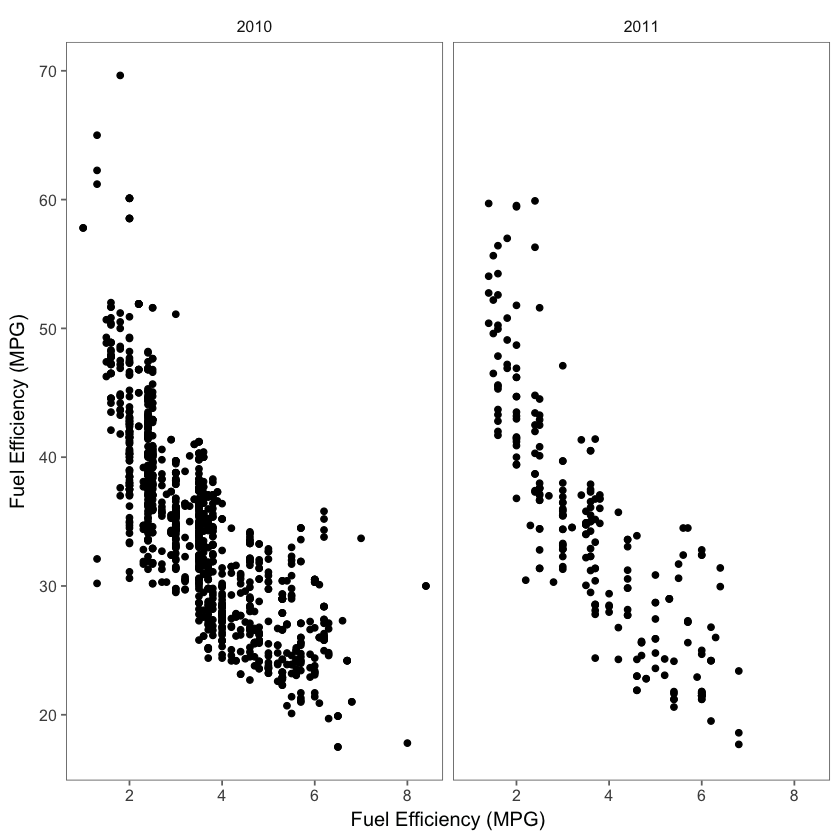

In [154]:
library(ggplot2)
library(scales)
library(ggthemes)

data2010 <- cars2010[,c('EngDispl','FE')]
data2010$Year <- 2010
data2011 <- cars2011[,c('EngDispl','FE')]
data2011$Year <- 2011

data <- rbind(data2010,data2011)

library(ggplot2)
library(ggthemes)
library(scales)

ggplot(data = data,aes(x=EngDispl,y=FE)) + geom_point() + facet_grid(.~Year) + theme_few() +
    labs(x = "Fuel Efficiency (MPG)",y = "Fuel Efficiency (MPG)")

In [114]:
trn <- data2010
vld <- data2011

library(caret)
fit_linear <- train(FE~EngDispl,data=trn,method = 'lm')
summary(fit_linear)

library(Metrics)
rmse(actual = trn$FE,predicted =fit_linear$finalModel$fitted.values )


Call:
lm(formula = .outcome ~ ., data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.486  -3.192  -0.365   2.671  27.215 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  50.5632     0.3985  126.89   <2e-16 ***
EngDispl     -4.5209     0.1065  -42.46   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.624 on 1105 degrees of freedom
Multiple R-squared:   0.62,	Adjusted R-squared:  0.6196 
F-statistic:  1803 on 1 and 1105 DF,  p-value: < 2.2e-16


[1] 4.620076

In [138]:
summary(trn)
summary(val)

    EngDispl           FE             Year     
 Min.   :1.000   Min.   :17.50   Min.   :2010  
 1st Qu.:2.400   1st Qu.:29.09   1st Qu.:2010  
 Median :3.500   Median :34.51   Median :2010  
 Mean   :3.507   Mean   :34.71   Mean   :2010  
 3rd Qu.:4.300   3rd Qu.:39.20   3rd Qu.:2010  
 Max.   :8.400   Max.   :69.64   Max.   :2010  

ERROR: Error in summary(val): object 'val' not found


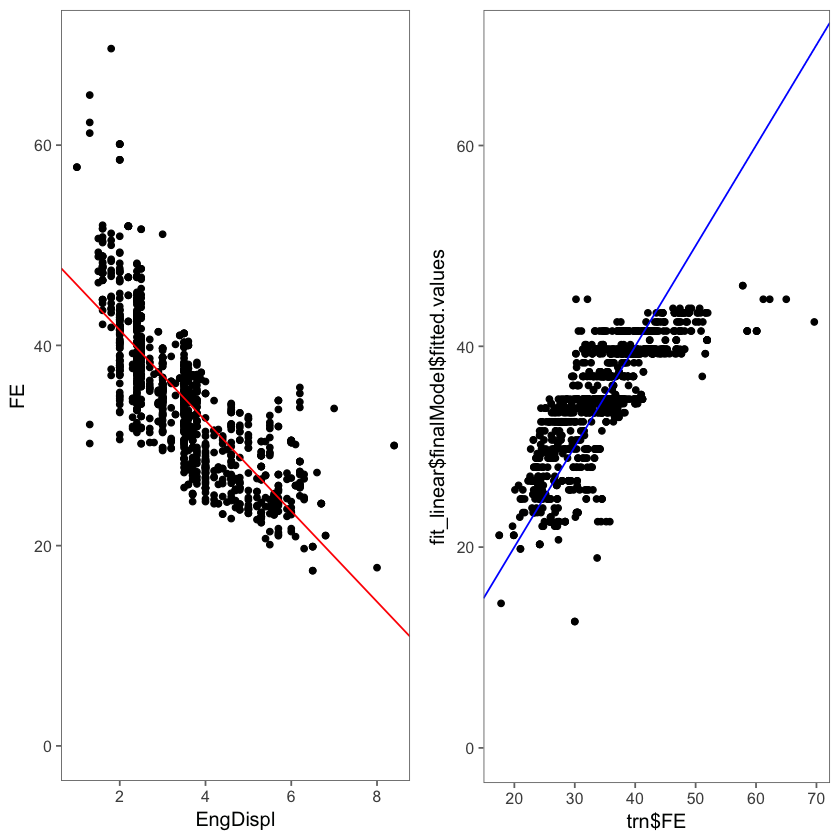

In [155]:
p1 <- ggplot(trn,aes(EngDispl,FE)) + geom_point() + scale_y_continuous(limits = c(0,70)) + theme_few() +
    geom_abline(intercept = fit_linear$finalModel$coefficients[1], slope = fit_linear$finalModel$coefficients[2],colour = "red")
p2 <- ggplot(data=trn,aes(x=trn$FE,y=fit_linear$finalModel$fitted.values)) + geom_point()  + geom_abline(colour = "blue") + 
    scale_y_continuous(limits = c(0,70)) +
    theme_few()

library(gridExtra)
grid.arrange(p1, p2, ncol=2)